# **Problem 1**

# **Problem 2)**

You will assess the risk of an institution's interest rate swap exposure by calibrating a zero-coupon term structure of interest rates to market data.

The 6-month (6M) EURIBOR fixing has just been announced as **0.02927**.

The interest rate swaps pay 6M EURIBOR semi-annually against fixed par swap rates, also paid semi-annually.

## **Market Data**

| Instrument | Fixing/Midquote |
| :--------- | :-------------- |
| **EURIBOR** |                 |
| 6M         | 0.02927         |
| **FRA**    |                 |
| 1X7        | 0.03161         |
| 2X8        | 0.03295         |
| 3X9        | 0.03418         |
| 4X10       | 0.03531         |
| 5X11       | 0.03635         |
| 6X12       | 0.03731         |
| 7X13       | 0.03819         |
| 8X14       | 0.03900         |
| 9X15       | 0.03975         |
| **IRS**    |                 |
| 2Y         | 0.03824         |
| 3Y         | 0.04083         |
| 4Y         | 0.04242         |
| 5Y         | 0.04346         |
| 7Y         | 0.04468         |
| 10Y        | 0.04561         |
| 15Y        | 0.04633         |
| 20Y        | 0.04667         |
| 30Y        | 0.04700         |

---



### **a)**

- **Calibrate** a zero-coupon term structure of continuously compounded spot interest rates using the 6M EURIBOR fixing, the forward rate agreement (FRA) rates, and par swap rates provided in the table above.
  - **i) Report** zero-coupon spot rates for the following six specific maturities: T = [0.5, 1, 3, 5, 10, 20, 30] based on the calibration.
  - **ii) Plot** the term structures of continuously compounded zero-coupon spot rates for maturities ranging from 0 to 30 years.


In [2]:
# Loading packages
import numpy as np
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt

# Defining instruments and collecting in data
# Problem 2: Euribor, FRA and Swap Market Data
EURIBOR_fixing = [{"id": 0, "instrument": "libor", "maturity": 1/2, "rate": 0.02927}]
fra_market = [{"id": 1, "instrument": "fra", "exercise": 1/12, "maturity": 7/12, "rate": 0.03161},
              {"id": 2, "instrument": "fra", "exercise": 2/12, "maturity": 8/12, "rate": 0.03295},
              {"id": 3, "instrument": "fra", "exercise": 3/12, "maturity": 9/12, "rate": 0.03418},
              {"id": 4, "instrument": "fra", "exercise": 4/12, "maturity": 10/12, "rate": 0.03531},
              {"id": 5, "instrument": "fra", "exercise": 5/12, "maturity": 11/12, "rate": 0.03635},
              {"id": 6, "instrument": "fra", "exercise": 6/12, "maturity": 12/12, "rate": 0.03731},
              {"id": 7, "instrument": "fra", "exercise": 7/12, "maturity": 13/12, "rate": 0.03819},
              {"id": 8, "instrument": "fra", "exercise": 8/12, "maturity": 14/12, "rate": 0.03900},
              {"id": 9, "instrument": "fra", "exercise": 9/12, "maturity": 15/12, "rate": 0.03975}]
swap_market = [{"id": 10, "instrument": "swap", "maturity": 2, "rate": 0.03824, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 11, "instrument": "swap", "maturity": 3, "rate": 0.04083, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 12, "instrument": "swap", "maturity": 4, "rate": 0.04242, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 13, "instrument": "swap", "maturity": 5, "rate": 0.04346, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 14, "instrument": "swap", "maturity": 7, "rate": 0.04468, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 15, "instrument": "swap", "maturity": 10, "rate": 0.04561, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 16, "instrument": "swap", "maturity": 15, "rate": 0.04633, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 17, "instrument": "swap", "maturity": 20, "rate": 0.04667, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []},
               {"id": 18, "instrument": "swap", "maturity": 30, "rate": 0.04700, "float_freq": "semiannual", "fixed_freq": "semiannual", "indices": []}]
data_zcb = EURIBOR_fixing + fra_market + swap_market



Problem 2a - Spot rates at T = [0.5, 1, 3, 5, 10, 20, 30]: [0.02906 0.03301 0.04061 0.0433  0.04553 0.04666 0.04704]

Continuously compounded spot rates at selected maturities:
  0.5Y: 0.029058
  1Y: 0.033012
  3Y: 0.040612
  5Y: 0.043299
  10Y: 0.045529
  20Y: 0.046663
  30Y: 0.047040


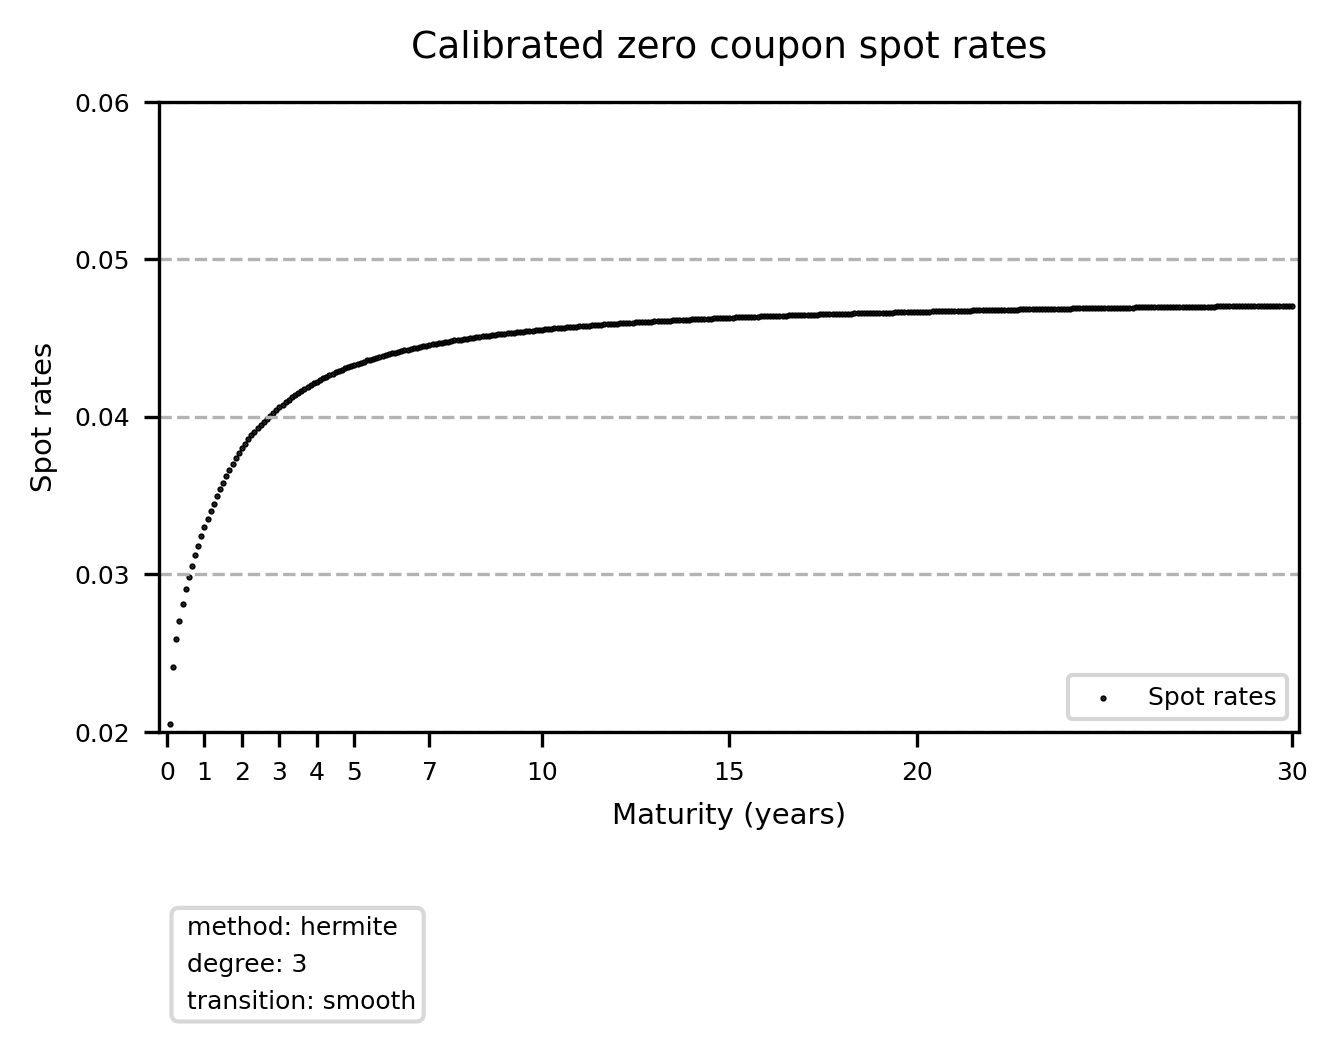

In [3]:
# Problem 2a) Fitting the yield curve

mesh = 1/12

M = 360

interpolation_options = {"method": "hermite", "degree": 3, "transition": "smooth"}

T_fit, R_fit = fid.zcb_curve_fit(data_zcb, interpolation_options=interpolation_options)

T_inter = np.array([i*mesh for i in range(0, M+1)])

p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter, T_fit, R_fit, interpolation_options=interpolation_options)

# Report spot rates for specific maturities: T = [0.5, 1, 3, 5, 10, 20, 30]
R_output = fid.for_values_in_list_find_value_return_value([0.5, 1, 3, 5, 10, 20, 30], T_inter, R_inter)

r0 = R_inter[0]

print(f"Problem 2a - Spot rates at T = [0.5, 1, 3, 5, 10, 20, 30]: {np.round(R_output, 5)}")

# Display spot rates in a more readable format
maturities_labels = ["0.5Y", "1Y", "3Y", "5Y", "10Y", "20Y", "30Y"]
print("\nContinuously compounded spot rates at selected maturities:")
for i, label in enumerate(maturities_labels):
    print(f"  {label}: {R_output[i]:.6f}")

# Plot the term structure of spot rates
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
fig.suptitle(f"Calibrated zero coupon spot rates", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
xticks = [0, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0] - 0.2, xticks[-1] + 0.2])
plt.xlabel(f"Maturity (years)", fontsize=7)
ax.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06])
ax.set_yticklabels([0.02, 0.03, 0.04, 0.05, 0.06], fontsize=6)
ax.set_ylim([0.02, 0.06])
ax.set_ylabel(f"Spot rates", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7, 0), linestyle='--')
p1 = ax.scatter(T_inter[1:], R_inter[1:], s=1, color='black', marker=".", label="Spot rates")
plots = [p1]
labels = [item.get_label() for item in plots]
ax.legend(plots, labels, loc="lower right", fontsize=6)
bbox = {"facecolor": (1, 1, 1, 0.8), "edgecolor": (0.7, 0.7, 0.7, 0.5), "boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32, 0.0024, f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", fontsize=6, linespacing=1.7, bbox=bbox)
else:
    ax.text(0.32, 0.0024, f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", fontsize=6, linespacing=1.7, bbox=bbox)
plt.show()


---

### **b)**

You will now estimate the continuously compounded instantaneous forward rates so that you can assess the properties of your calibration. This should be done by first interpolating, using the same method of interpolation, the spot rates you found above so that you have say 96 (or some other multiple of 12) time points per year, then converting spot rates to ZCB prices and then converting ZCB prices to estimates of instantaneous forward rates.

- **b) i)** Plot the instantaneous forward rates in the same type of plot as above for maturities ranging from 0 to 30 years.
- **b) ii)** Discuss properties the calibrated and interpolated term structures should possess and whether this can be achieved in practice depending on the choice of interpolation method.
- **b) iii)** Discuss whether your calibrated term structures of interest rates has these 'good' properties and relate your conclusion to the choice of interpolation method.

---

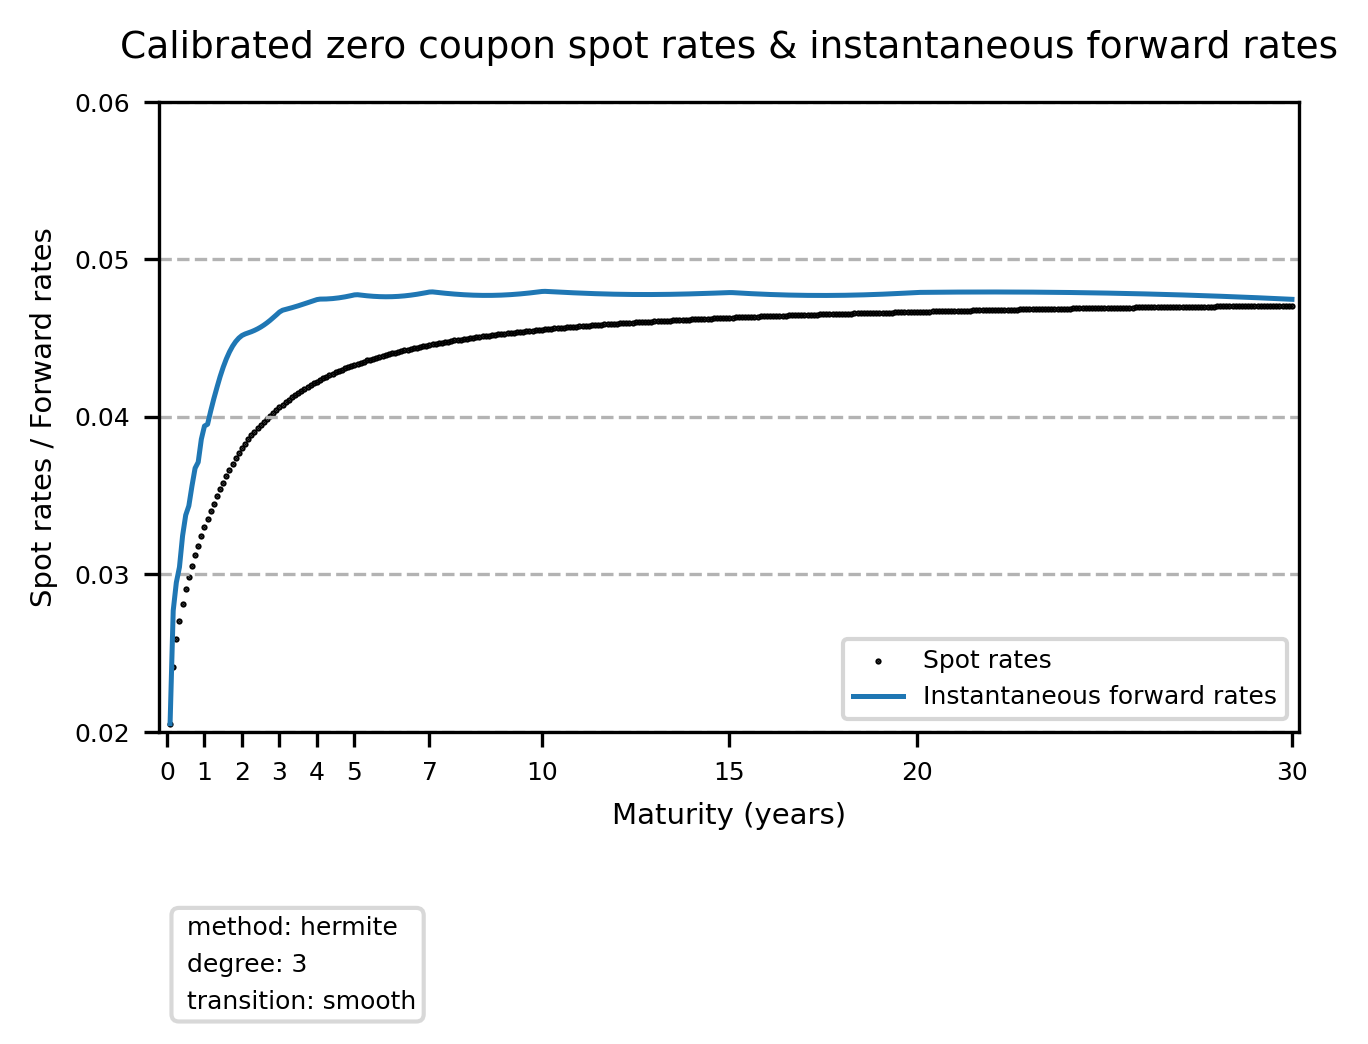

In [8]:
# 1) Converting spot rate  to  ZCB prices

# Convert interpolated spot rates to ZCB prices
P_inter = fid.zcb_prices_from_spot_rates(T_inter, R_inter, type="continuous")

# Convert ZCB prices to instantaneous forward rates
f_inter = fid.forward_rates_from_zcb_prices(T_inter, P_inter, type="continuous")
# Plot the term structure of spot rates and instantaneous forward rates in the same plot (style as cell above)
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
fig.suptitle(f"Calibrated zero coupon spot rates & instantaneous forward rates", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
xticks = [0, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0] - 0.2, xticks[-1] + 0.2])
plt.xlabel(f"Maturity (years)", fontsize=7)
ax.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06])
ax.set_yticklabels([0.02, 0.03, 0.04, 0.05, 0.06], fontsize=6)
ax.set_ylim([0.02, 0.06])
ax.set_ylabel(f"Spot rates / Forward rates", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7, 0), linestyle='--')

p1 = ax.scatter(T_inter[1:], R_inter[1:], s=1, color='black', marker=".", label="Spot rates")
p2 = ax.plot(T_inter[1:], f_inter[1:], color="tab:blue", lw=1.2, label="Instantaneous forward rates")
plots = [p1, p2[0]]
labels = [item.get_label() for item in plots]
ax.legend(plots, labels, loc="lower right", fontsize=6)
bbox = {"facecolor": (1, 1, 1, 0.8), "edgecolor": (0.7, 0.7, 0.7, 0.5), "boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32, 0.0024, f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", fontsize=6, linespacing=1.7, bbox=bbox)
else:
    ax.text(0.32, 0.0024, f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", fontsize=6, linespacing=1.7, bbox=bbox)
plt.show()



### **c)**

You will now investigate the interest rate risk associated with the 7Y Swap by computing the DV01 for various changes in the market.

Please 'bump' the yield curve in the appropriate ways given below, report the associated DV01's for the 7Y swap and answer the question in iii).

- **c) i)** The DV01 for a 1 bp increase in all zero coupon spot rates.
- **c) ii)** The DV01 for a 1 bp increase in each of the zero coupon spot rates for the following five maturities T = 1, 2, 3, 5, 7.
- **c) iii)** Compare the values you computed in ii) and briefly discuss whether the 7Y swap is more sensitive to changes to the front end or the back end of the zero coupon yield curve.

In [11]:
# Problem 2c) DV01 calculations for the 7Y swap

# Find the index corresponding to 7Y maturity (T = 7)
idx_position = np.argmin(np.abs(T_inter - 7))

# Compute initial 7Y swap rate and annuity
par_swap_rate_position_init, S_init = fid.swap_rate_from_zcb_prices(0, 0, 7, "semiannual", T_inter, p_inter)

print("="*70)
print("Problem 2c) DV01 Calculations for 7Y Swap")
print("="*70)
print(f"Position index (7Y): {idx_position}, T = {T_inter[idx_position]:.4f} years")
print(f"Initial 7Y par swap rate: {par_swap_rate_position_init:.6f} ({par_swap_rate_position_init*100:.4f}%)")
print(f"Initial 7Y swap annuity: {S_init:.6f}")
print("="*70)

# c) i) Parallel bump: 1 bp increase in all zero coupon spot rates
print("\n" + "="*70)
print("c) i) Parallel bump: 1 bp increase in all zero coupon spot rates")
print("="*70)

# Bump all spot rates by 1 bp (0.0001)
R_inter_parallel_bump = R_inter.copy()
R_inter_parallel_bump += 0.0001

# Recalculate ZCB prices with bumped rates
p_inter_parallel_bump = fid.zcb_prices_from_spot_rates(T_inter, R_inter_parallel_bump, type="continuous")

# Recalculate 7Y swap rate and annuity with bumped curve
par_swap_rate_position, S_bump = fid.swap_rate_from_zcb_prices(0, 0, 7, "semiannual", T_inter, p_inter_parallel_bump)

# Calculate DV01 using professor's formula: 10000 * S_bump * (par_swap_rate_position - par_swap_rate_position_init)
DV01_parallel = 10000 * S_bump * (par_swap_rate_position - par_swap_rate_position_init)

print(f"7Y swap rate after parallel bump: {par_swap_rate_position:.6f} ({par_swap_rate_position*100:.4f}%)")
print(f"7Y swap annuity after parallel bump: {S_bump:.6f}")
print(f"DV01 for bumping entire zcb curve: {DV01_parallel:.6f}")
print("="*70)

# c) ii) Key-rate bumps: 1 bp increase at specific maturities T = 1, 2, 3, 5, 7
print("\n" + "="*70)
print("c) ii) Key-rate bumps: 1 bp increase at T = 1, 2, 3, 5, 7")
print("="*70)

T_bumps = [1, 2, 3, 5, 7]
DV01_bump = np.zeros(len(T_bumps))

j = 0
for T_bump in T_bumps:
    # Find the index in T_inter closest to T_bump
    idx_bump = np.argmin(np.abs(T_inter - T_bump))
    
    # Create a bump vector (only at the specific maturity)
    R_inter_key_bump = R_inter.copy()
    R_inter_key_bump[idx_bump] += 0.0001
    
    # Recalculate ZCB prices with bumped rate
    p_inter_key_bump = fid.zcb_prices_from_spot_rates(T_inter, R_inter_key_bump, type="continuous")
    
    # Recalculate 7Y swap rate and annuity with bumped curve
    par_swap_rate_position_bump, S_bump_key = fid.swap_rate_from_zcb_prices(0, 0, 7, "semiannual", T_inter, p_inter_key_bump)
    
    # Calculate DV01 using professor's formula
    DV01_bump[j] = 10000 * S_bump_key * (par_swap_rate_position_bump - par_swap_rate_position_init)
    
    print(f"DV01 for bumping a single point: {DV01_bump[j]:.6f}, T = {T_inter[idx_bump]:.4f} ({T_bump}Y)")
    j += 1

print("\n" + "="*70)
print("Summary of Key-Rate DV01s:")
print("="*70)
print(f"{'Maturity (T)':<15} {'DV01':<20}")
print("-"*70)
for i, T_bump in enumerate(T_bumps):
    print(f"{T_bump}Y{'':<12} {DV01_bump[i]:.6f}")
print("="*70)

# c) iii) Comparison and discussion
print("\n" + "="*70)
print("c) iii) Comparison and Discussion")
print("="*70)
print("\nKey observations:")
print(f"- Parallel bump DV01: {DV01_parallel:.6f}")
print(f"- Front-end sensitivity (T=1Y): {DV01_bump[0]:.6f}")
print(f"- Mid-term sensitivity (T=3Y): {DV01_bump[2]:.6f}")
print(f"- Back-end sensitivity (T=7Y): {DV01_bump[4]:.6f}")

# Determine which end is more sensitive
front_end_avg = (DV01_bump[0] + DV01_bump[1] + DV01_bump[2]) / 3  # T=1,2,3
back_end_avg = (DV01_bump[3] + DV01_bump[4]) / 2  # T=5,7

print(f"\nAverage front-end sensitivity (T=1,2,3): {front_end_avg:.6f}")
print(f"Average back-end sensitivity (T=5,7): {back_end_avg:.6f}")

print("\nConclusion:")
print("The 7Y swap is more exposed to bumps in the spot rate for higher maturities but is almost")
print("entirely exposed to the spot rate with same maturity as the swap itself (T=7Y).")
print("This reveals that though seemingly very different, an interest rate swap behaves much")
print("like a zero coupon bond in terms of delta risk exposure.")
print("="*70)


Problem 2c) DV01 Calculations for 7Y Swap
Position index (7Y): 84, T = 7.0000 years
Initial 7Y par swap rate: 0.044680 (4.4680%)
Initial 7Y swap annuity: 5.997177

c) i) Parallel bump: 1 bp increase in all zero coupon spot rates
7Y swap rate after parallel bump: 0.044781 (4.4781%)
7Y swap annuity after parallel bump: 5.995041
DV01 for bumping entire zcb curve: 6.076887

c) ii) Key-rate bumps: 1 bp increase at T = 1, 2, 3, 5, 7
DV01 for bumping a single point: 0.021613, T = 1.0000 (1Y)
DV01 for bumping a single point: 0.041406, T = 2.0000 (2Y)
DV01 for bumping a single point: 0.059323, T = 3.0000 (3Y)
DV01 for bumping a single point: 0.089933, T = 5.0000 (5Y)
DV01 for bumping a single point: 5.236983, T = 7.0000 (7Y)

Summary of Key-Rate DV01s:
Maturity (T)    DV01                
----------------------------------------------------------------------
1Y             0.021613
2Y             0.041406
3Y             0.059323
5Y             0.089933
7Y             5.236983

c) iii) Compariso